In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.2.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

In [3]:
train_dir = "/opt/monkey/training/training"
valid_dir = "/opt/monkey/validation/validation"
label_file = "/opt/monkey/monkey_labels.txt"

print(os.path.exists(train_dir))
print(os.path.exists(valid_dir))
print(os.path.exists(label_file))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
True
True
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [4]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [5]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [7]:
epochs = 100
history = model.fit(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

Epoch 1/100
17/17 [==============================] - 36s 2s/step - loss: 2.4200 - accuracy: 0.1170 - val_loss: 2.2926 - val_accuracy: 0.1523
Epoch 2/100
17/17 [==============================] - 35s 2s/step - loss: 2.2409 - accuracy: 0.1867 - val_loss: 2.1660 - val_accuracy: 0.1133
Epoch 3/100
17/17 [==============================] - 36s 2s/step - loss: 2.0380 - accuracy: 0.2398 - val_loss: 1.8778 - val_accuracy: 0.3828
Epoch 4/100
17/17 [==============================] - 35s 2s/step - loss: 1.8744 - accuracy: 0.3153 - val_loss: 1.7019 - val_accuracy: 0.3672
Epoch 5/100
17/17 [==============================] - 35s 2s/step - loss: 1.9045 - accuracy: 0.3288 - val_loss: 1.7234 - val_accuracy: 0.3945
Epoch 6/100
17/17 [==============================] - 35s 2s/step - loss: 1.7404 - accuracy: 0.3607 - val_loss: 1.5188 - val_accuracy: 0.4609
Epoch 7/100
17/17 [==============================] - 35s 2s/step - loss: 1.6895 - accuracy: 0.3907 - val_loss: 1.4890 - val_accuracy: 0.4805
Epoch 8/100
1

Epoch 59/100
17/17 [==============================] - 36s 2s/step - loss: 0.6575 - accuracy: 0.7718 - val_loss: 0.7862 - val_accuracy: 0.7461
Epoch 60/100
17/17 [==============================] - 37s 2s/step - loss: 0.6165 - accuracy: 0.7834 - val_loss: 0.7584 - val_accuracy: 0.7500
Epoch 61/100
17/17 [==============================] - 35s 2s/step - loss: 0.5479 - accuracy: 0.8056 - val_loss: 0.7559 - val_accuracy: 0.7539
Epoch 62/100
17/17 [==============================] - 35s 2s/step - loss: 0.5057 - accuracy: 0.8230 - val_loss: 0.7340 - val_accuracy: 0.7578
Epoch 63/100
17/17 [==============================] - 37s 2s/step - loss: 0.5101 - accuracy: 0.8162 - val_loss: 0.7189 - val_accuracy: 0.8008
Epoch 64/100
17/17 [==============================] - 37s 2s/step - loss: 0.5335 - accuracy: 0.8143 - val_loss: 0.7501 - val_accuracy: 0.7695
Epoch 65/100
17/17 [==============================] - 35s 2s/step - loss: 0.5232 - accuracy: 0.8037 - val_loss: 0.6166 - val_accuracy: 0.7891
Epoch 

In [14]:
img = image.load_img('/opt/monkey/monkey.jpg',target_size=(128,128))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
preds = model.predict(img)
i = np.argmax(preds)
os.listdir(train_dir)[i]

'n4'

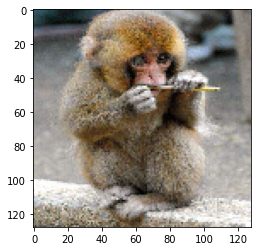

In [10]:
plt.imshow(img)

ValueError: Unsupported image shape: (1, 128, 128, 3)

In [12]:
preds

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
!nvidia-smi

Mon Jul  6 15:46:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.126.02   Driver Version: 418.126.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:AF:00.0 Off |                    0 |
| N/A   63C    P0    32W /  70W |  11213MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        